In [3]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

NameError: name 'upload' is not defined

**Description of Dataset- hcvdat0.csv**([https://archive.ics.uci.edu/ml/datasets/HCV+data#])

---


The data set contains laboratory values of blood donors and Hepatitis C patients and demographic values like age.

Data Set Characteristics :  Multivariate

Number of Instances      :  615

Area                     :  Life

Attribute Characteristics:  Integer, Real

Number of Attributes     :  14


The target attribute for classification is Category (blood donors vs. Hepatitis C (including its progress ('just' Hepatitis C, Fibrosis, Cirrhosis).

**Attribute Information:**
All attributes except Category and Sex are numerical. The laboratory data are the attributes 5-14.


1. X (Patient ID/No.)
2. Category (diagnosis) (values: '0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis', '2=Fibrosis', '3=Cirrhosis')
3. Age (in years)
4. Sex (f,m)
5. ALB
6. ALP
7. ALT
8. AST
9. BLI
10.CHE
11.CHOL
12.CREA
13.GGT
14.PROT

##################################################
First 5 rows of the dataset
##################################################
   Unnamed: 0       Category  Age Sex   ALB  ...    CHE  CHOL   CREA   GGT  PROT
0           1  0=Blood Donor   32   m  38.5  ...   6.93  3.23  106.0  12.1  69.0
1           2  0=Blood Donor   32   m  38.5  ...  11.17  4.80   74.0  15.6  76.5
2           3  0=Blood Donor   32   m  46.9  ...   8.84  5.20   86.0  33.2  79.3
3           4  0=Blood Donor   32   m  43.2  ...   7.33  4.74   80.0  33.8  75.7
4           5  0=Blood Donor   32   m  39.2  ...   9.15  4.32   76.0  29.9  68.7

[5 rows x 14 columns]
##################################################
Statistical description of the dataset
##################################################
       Unnamed: 0         Age         ALB  ...         CREA         GGT        PROT
count  615.000000  615.000000  614.000000  ...   615.000000  615.000000  614.000000
mean   308.000000   47.408130   41.620195  ...    81

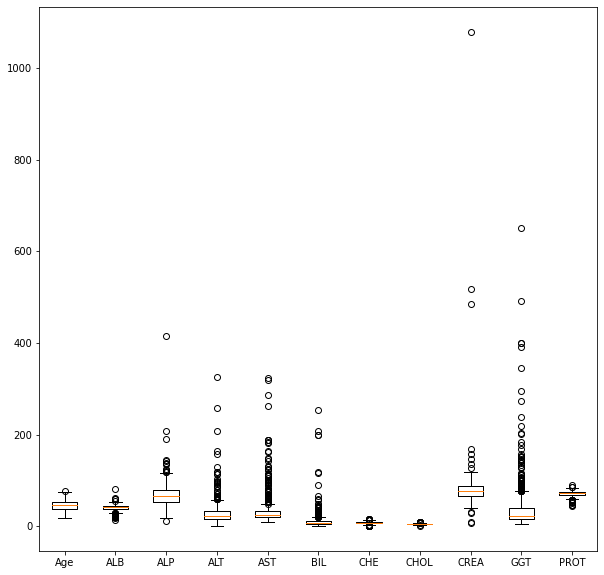

['Unnamed: 0', 'Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


##################################################
After Min Max normalization
##################################################
     Unnamed: 0       Category  Age  ...      CREA        GGT      PROT
0             1  0=Blood Donor   32  ...  1.495752   1.410736  5.619469
1             2  0=Blood Donor   32  ...  1.823453   1.105817  5.818584
2             3  0=Blood Donor   32  ...  1.554570   1.154548  7.311947
3             4  0=Blood Donor   32  ...  1.655401   1.399598  7.869469
4             5  0=Blood Donor   32  ...  1.604986   1.407952  7.152655
..          ...            ...  ...  ...       ...        ...       ...
610         611    3=Cirrhosis   62  ...  2.076370   2.344988  6.117257
611         612    3=Cirrhosis   64  ...  1.400803  10.000000  5.719027
612         613    3=Cirrhosis   64  ...  1.462142   1.437191  6.276549
613         614    3=Cirrhosis   46  ...  1.493231   1.831219  8.407080
614         615    3=Cirrhosis   59  ...  1.369713   1.633509  6.216814

[615 

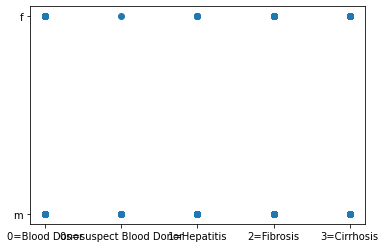

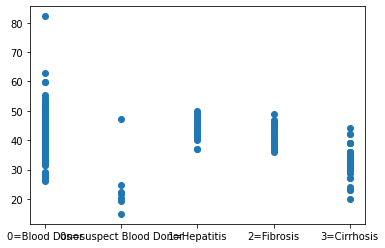

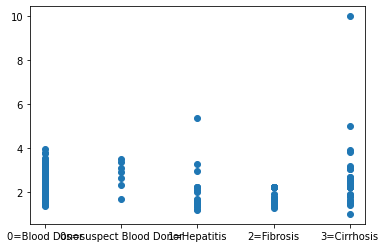

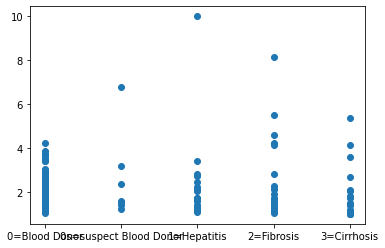

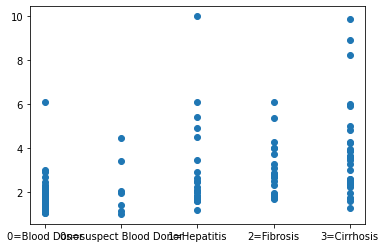

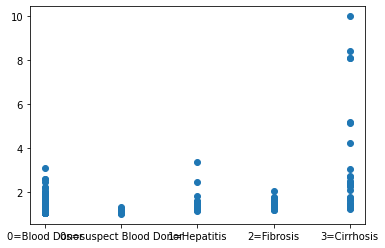

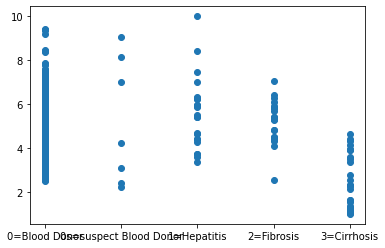

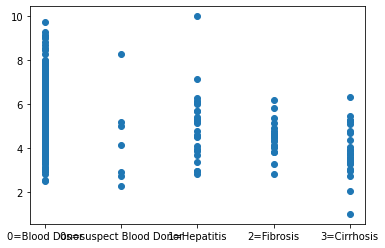

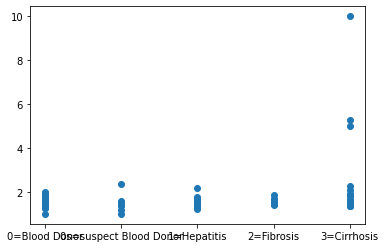

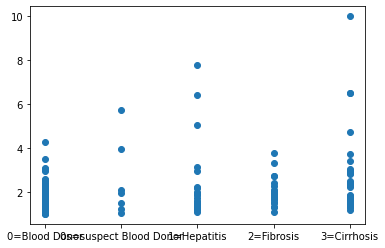

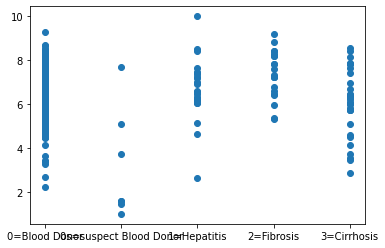

In [28]:
import statistics
import matplotlib.pyplot as plt 
#Load the dataset
df = pd.read_csv("hcvdat0.csv")
print("##################################################")
print("First 5 rows of the dataset")
print("##################################################")
print(df.head())
#Description of dataset
print("##################################################")
print("Statistical description of the dataset")
print("##################################################")
print(df.describe())
#find number of missing values in each column 
print("##################################################")
print("Number of missing values in each column")
print("##################################################")
print(df.isnull().sum())
#Replace the null values using median value
median_ALB = df['ALB'].median()
median_ALP = df['ALP'].median()
median_ALT = df['ALT'].median()
median_CHOL = df['CHOL'].median()
median_PROT = df['PROT'].median()
df['ALB'].fillna(median_ALB, inplace=True)
df['ALP'].fillna(median_ALP, inplace=True)
df['ALT'].fillna(median_ALT, inplace=True)
df['CHOL'].fillna(median_CHOL, inplace=True)
df['PROT'].fillna(median_PROT, inplace=True)
print("##################################################")
print("Number of Null values after replace : " ,df.isnull().sum().sum())
print("##################################################")
print("BoxPlot fpr the condition attributes")
print("##################################################")
data = [df['Age'],df['ALB'],df['ALP'],df['ALT'],df['AST'],df['BIL'],df['CHE'],df['CHOL'],df['CREA'],df['GGT'],df['PROT']]
fig,ax = plt.subplots(figsize=(10,10)) 
ax.boxplot(data,labels=["Age","ALB","ALP","ALT","AST","BIL","CHE","CHOL","CREA","GGT","PROT"]) 
plt.show()
#Min Max normalization
def minmaxnormalization(col,ll,ul):
  arr1 = []
  mean = df[col].mean()
  sd = statistics.stdev(df[col])
  max = df[col].max()
  min = df[col].min()
  for i in df[col]: 
    val = (i - min) / (max - min)
    val1 = val * (ul - ll)+ll
    arr1.append(val1)
   
  for  k in range(len(df)):
    df[col][k] = arr1[k-1]

columns = list(df)
print(columns)
for i in columns[5:]:
  minmaxnormalization(i,1,10)

print("##################################################")
print("After Min Max normalization")
print("##################################################")
print(df)

print("##################################################")
print("Scatter Plot")
print("##################################################")
for i in columns[3:]:
  plt.scatter(df['Category'],df[i])
#  plt.xlabel('Catagory') 
#  plt.ylabel(i) 
  plt.show()



**BoxPlot Analysis**
From the box it is clear that all the 11 attribute has outliers.The highest value and highest mean value is for the CREA attribute.Similarly the lowest mean is for CHOL attribute.
Data Transformation Technique,Normalization is done on conditional attribute and the value is changed to a range of 1 to 10.
Finally Scatter plot is used to visualize dataset attributes.Here the target attribute is 'Catagory', and in the scatter plot, all the conditional attribute is compared with this target Attribute 
